In [2]:
import math
import collections
import urllib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
urllib.request.urlretrieve('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt', 'readme.txt')

('readme.txt', <http.client.HTTPMessage at 0x7fa31074dcd0>)

In [4]:
urllib.request.urlretrieve('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt', 'stations.txt')

('stations.txt', <http.client.HTTPMessage at 0x7fa31074dd30>)

In [5]:
stations = np.genfromtxt('stations.txt', delimiter = [11, 9, 10, 7, 3, 31, 4, 4, 6],
                                        names = ['id', 'latitude', 'longitude', 'elevation', 'state', 'name',
                                                 'gsn_flag', 'hcn_flag', 'wmo_id'],
                                        dtype = ['U11', 'd', 'd', 'd', 'U3', 'U31', 'U4', 'U4', 'U6'],
                                        autostrip = True)

In [6]:
print(stations)

[('ACW00011604',  17.1167, -61.7833,   10.1, '', 'ST JOHNS COOLIDGE FLD', '', '', '')
 ('ACW00011647',  17.1333, -61.7833,   19.2, '', 'ST JOHNS', '', '', '')
 ('AE000041196',  25.333 ,  55.517 ,   34. , '', 'SHARJAH INTER. AIRP', 'GSN', '', '41196')
 ...
 ('ZI000067977', -21.017 ,  31.583 ,  430. , '', 'BUFFALO RANGE', '', '', '67977')
 ('ZI000067983', -20.2   ,  32.616 , 1132. , '', 'CHIPINGE', 'GSN', '', '67983')
 ('ZI000067991', -22.217 ,  30.    ,  457. , '', 'BEITBRIDGE', '', '', '67991')]


In [7]:
stations.dtype.names

('id',
 'latitude',
 'longitude',
 'elevation',
 'state',
 'name',
 'gsn_flag',
 'hcn_flag',
 'wmo_id')

In [8]:
len(stations)

119503

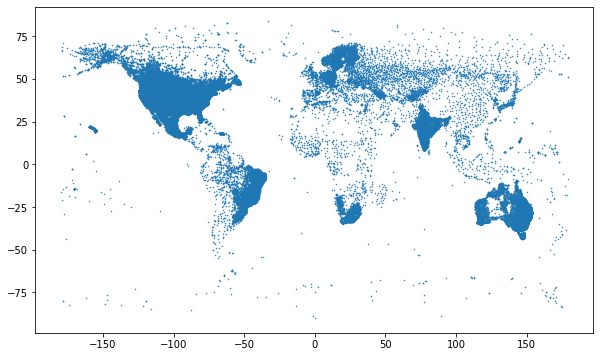

In [9]:
plt.figure(figsize = (10, 6))
plt.plot(stations['longitude'], stations['latitude'], '.', markersize = 1)
plt.show()

In [10]:
# narrow the searches down to states and cities
stations[stations['state'] == 'CA']

array([('US1CAAL0001', 37.8123, -122.216 ,  113.4, 'CA', 'PIEDMONT 1.0 SE', '', '', ''),
       ('US1CAAL0002', 37.7075, -122.0687,   87.5, 'CA', 'CASTRO VALLEY 0.5 WSW', '', '', ''),
       ('US1CAAL0003', 37.7169, -122.0585,  163.4, 'CA', 'CASTRO VALLEY 0.4 NNE', '', '', ''),
       ...,
       ('USW00093243', 37.2381, -120.8825,   23.8, 'CA', 'MERCED 23 WSW', '', '', '74507'),
       ('USW00093245', 38.3208, -123.0747,   19.2, 'CA', 'BODEGA 6 WSW', '', '', '74518'),
       ('USW00094299', 41.4914, -120.5644, 1333.5, 'CA', 'ALTURAS MUNI AP', '', '', '')],
      dtype=[('id', '<U11'), ('latitude', '<f8'), ('longitude', '<f8'), ('elevation', '<f8'), ('state', '<U3'), ('name', '<U31'), ('gsn_flag', '<U4'), ('hcn_flag', '<U4'), ('wmo_id', '<U6')])

In [11]:
stations[stations['state'] == 'ON']

array([('CA006010735', 53.8167, -89.9   , 223. , 'ON', 'BIG TROUT LAKE', '', '', '71675'),
       ('CA006010738', 53.8333, -89.8667, 224. , 'ON', 'BIG TROUT LAKE', '', '', ''),
       ('CA006010739', 53.8167, -89.9   , 222. , 'ON', 'BIG TROUT LAKE READAC', 'GSN', '', '71844'),
       ...,
       ('CA1ON000845', 44.9931, -75.0025, 200.9, 'ON', 'INGLESIDE 1.0 WSW - SNCA', '', '', ''),
       ('CA1ON000846', 45.3144, -75.9239, 105.2, 'ON', 'KANATA 1.7 W', '', '', ''),
       ('CAW00064757', 44.2325, -79.7811, 246. , 'ON', 'EGBERT 1 W', '', '', '')],
      dtype=[('id', '<U11'), ('latitude', '<f8'), ('longitude', '<f8'), ('elevation', '<f8'), ('state', '<U3'), ('name', '<U31'), ('gsn_flag', '<U4'), ('hcn_flag', '<U4'), ('wmo_id', '<U6')])

In [12]:
stations[stations['state'] == 'QC']

array([('CA007010478', 47.1667, -71.25  ,  597. , 'QC', 'BARRIERE STONEHAM', '', '', ''),
       ('CA007010480', 47.1667, -71.6167,  494. , 'QC', 'BARRIERE TOURILLI', '', '', ''),
       ('CA007010565', 46.8333, -71.2   ,   10. , 'QC', 'BEAUPORT', '', '', '71578'),
       ('CA007010566', 46.8833, -71.2   ,   84. , 'QC', 'BEAUPORT', '', '', ''),
       ('CA007010720', 46.05  , -73.1833,   12. , 'QC', 'BERTHIERVILLE', '', '', ''),
       ('CA007011045', 46.3667, -72.5333,   17. , 'QC', 'CAP DE LA MADELEINE', '', '', ''),
       ('CA007011170', 46.7667, -71.3   ,   12. , 'QC', 'CAP ROUGE', '', '', ''),
       ('CA007011290', 46.4667, -72.3333,   12. , 'QC', 'CHAMPLAIN', '', '', ''),
       ('CA007011308', 46.9   , -71.3   ,  152. , 'QC', 'CHARLESBOURG JAR ZOO', '', '', ''),
       ('CA007011309', 46.8667, -71.2667,  114. , 'QC', 'CHARLESBOURG PARC ORLEAN', '', '', ''),
       ('CA007011600', 46.8667, -71.8667,  152. , 'QC', 'CHUTE PANET', '', '', ''),
       ('CA007011760', 47.0333, -71.7

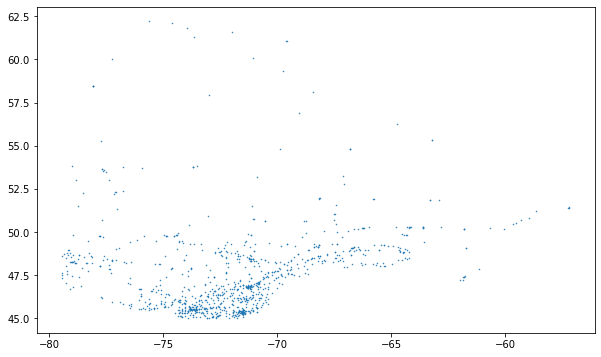

In [13]:
stations_qc = stations[stations['state'] == 'QC']
plt.figure(figsize = (10, 6))
plt.plot(stations_qc['longitude'], stations_qc['latitude'], '.', markersize = 1)
plt.show()

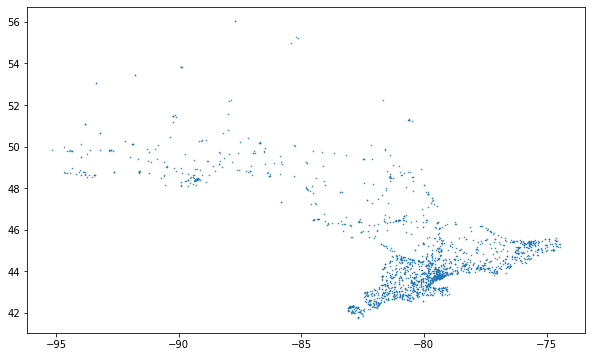

In [14]:
stations_on = stations[stations['state'] == 'ON']
plt.figure(figsize = (10, 6))
plt.plot(stations_on['longitude'], stations_on['latitude'], '.', markersize = 1)
plt.show()

In [15]:
stations[np.char.find(stations['name'], 'MONTREAL') == 0]

array([('CA006055300', 47.25  , -84.4   , 408., 'ON', 'MONTREAL FALLS', '', '', ''),
       ('CA006055302', 47.2667, -84.4333, 306., 'ON', 'MONTREAL FALLS', '', '', ''),
       ('CA006055378', 47.25  , -84.6   , 535., 'ON', 'MONTREAL RIVER (AUT)', '', '', ''),
       ('CA006075379', 47.1167, -79.4833, 183., 'ON', 'MONTREAL RIVER', '', '', ''),
       ('CA007025245', 45.4667, -73.5   ,  14., 'QC', 'MONTREAL ICE CONTROL', '', '', ''),
       ('CA007025250', 45.4667, -73.75  ,  36., 'QC', 'MONTREAL/PIERRE ELLIOTT TRUDEA', '', '', '71627'),
       ('CA007025251', 45.4706, -73.7408,  36., 'QC', 'MONTREAL INTL A', '', '', '71627'),
       ('CA007025252', 45.6333, -73.55  ,  50., 'QC', 'MONTREAL-EST', '', '', ''),
       ('CA007025257', 45.5667, -73.55  ,  46., 'QC', 'MONTREAL JAR BOT', '', '', ''),
       ('CA007025260', 45.5   , -73.6167, 133., 'QC', 'MONTREAL JEAN BREBEUF', '', '', ''),
       ('CA007025267', 45.5167, -73.5667,  41., 'QC', 'MONTREAL LAFONTAINE', '', '', ''),
       ('CA007

In [16]:
stations[np.char.find(stations['name'], 'TORONTO') == 0]

array([('ASN00061322', -33.0025, 151.5794,  10. , '', 'TORONTO WWTP', '', '', ''),
       ('CA006158350',  43.6667, -79.4   , 113. , 'ON', 'TORONTO', '', '', '71266'),
       ('CA006158355',  43.6667, -79.4   , 113. , 'ON', 'TORONTO CITY', '', '', '71508'),
       ('CA006158363',  43.7833, -79.2667, 180. , 'ON', 'TORONTO AGINCOURT', '', '', ''),
       ('CA006158370',  43.6667, -79.3167,  74. , 'ON', 'TORONTO ASHBRIDGES BAY', '', '', ''),
       ('CA006158381',  43.6667, -79.2833,  99. , 'ON', 'TORONTO BALMY BEACH', '', '', ''),
       ('CA006158384',  43.75  , -79.2667, 168. , 'ON', 'TORONTO BEACON ROAD', '', '', ''),
       ('CA006158385',  43.7167, -79.3167, 138. , 'ON', 'TORONTO BERMONDSEY', '', '', ''),
       ('CA006158386',  43.7333, -79.5   , 145. , 'ON', 'TORONTO BEVERLEY HILLS', '', '', ''),
       ('CA006158398',  43.7667, -79.5167, 186. , 'ON', 'TORONTO BLACK CREEK', '', '', ''),
       ('CA0061583FL',  43.7   , -79.4833, 154. , 'ON', 'TORONTO AMESBURY', '', '', ''),
      

In [17]:
stations[np.char.find(stations['name'], 'OTTAWA') == 0]

array([('CA006105887', 45.4   , -75.7167,  72. , 'ON', 'OTTAWA', '', '', ''),
       ('CA006105910', 45.3333, -75.6333,  98. , 'ON', 'OTTAWA ALBION RD', '', '', ''),
       ('CA006105913', 45.3833, -75.75  ,  81. , 'ON', 'OTTAWA ALTA VISTA', '', '', ''),
       ('CA006105938', 45.4   , -75.6667,  61. , 'ON', 'OTTAWA BECKWITH RD', '', '', ''),
       ('CA006105950', 45.35  , -75.65  ,  92. , 'ON', 'OTTAWA BILLINGS BRIDGE', '', '', ''),
       ('CA006105960', 45.3667, -75.8   ,  58. , 'ON', 'OTTAWA BRITANNIA', '', '', ''),
       ('CA006105976', 45.3833, -75.7167,  79. , 'ON', 'OTTAWA CDA', '', '', ''),
       ('CA006105978', 45.3833, -75.7167,  79. , 'ON', 'OTTAWA CDA RCS', '', '', '71063'),
       ('CA006105980', 45.4333, -75.7   ,  56. , 'ON', 'OTTAWA CITY HALL', '', '', ''),
       ('CA006105993', 45.3167, -75.9   , 107. , 'ON', 'OTTAWA HAZELDEAN', '', '', ''),
       ('CA006105995', 45.3667, -75.6833,  79. , 'ON', 'OTTAWA HOGS BACK', '', '', ''),
       ('CA006106000', 45.3167, -75.

In [18]:
urllib.request.urlretrieve('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/all/CA006106098.dly', 'OTTAWA.dly')

('OTTAWA.dly', <http.client.HTTPMessage at 0x7fa316e24580>)

In [19]:
urllib.request.urlretrieve('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/all/CA006158355.dly', 'TORONTO.dly')

('TORONTO.dly', <http.client.HTTPMessage at 0x7fa310711af0>)

In [20]:
%pip install getweather

Note: you may need to restart the kernel to use updated packages.
